## Installing Nashpy

If you want to install [Nashpy](https://github.com/drvinceknight/Nashpy), I recommend the following:

1. Use the Anaconda distribution of Python (this works well on Windows)
2. Open a terminal (Mac OSX) or a command prompt (Windows) and type: `pip install nashpy`

Once you have done that succsefully you should be able to `import nash` in Python to import the library.

In the cell below I am importing the library and checking the version.

In [90]:
import nash
import numpy as np
import sympy as sym
sym.init_printing()
nash.__version__

'0.0.3'

## Computing equilibria

Let us use Nashpy to study the battle of the sexes game:


$$
A = 
\begin{pmatrix}
2 & 0\\
1 & 3
\end{pmatrix}
$$


$$
B = 
\begin{pmatrix}
3 & 0\\
1 & 2
\end{pmatrix}
$$

In [23]:
A = [[2, 0], [1, 3]]
B = [[3, 0], [1, 2]]
g = nash.Game(A, B)
g

Bi matrix game with payoff matrices:

Row player:
[[2 0]
 [1 3]]

Column player:
[[3 0]
 [1 2]]

We can obtain the Nash equilibria for this game:

In [24]:
eq = list(g.equilibria())
eq

[(array([ 1.,  0.]), array([ 1.,  0.])),
 (array([ 0.,  1.]), array([ 0.,  1.])),
 (array([ 0.25,  0.75]), array([ 0.75,  0.25]))]

We see that we have 3 equilibria: 2 pure, where the players coordinate and 1 mixed where the players don't.

We can see the utility obtained by each player at each equilibria:

- For the row player: $s_1 A s_2$
- For the column player: $s_1 B s_2$

In [25]:
for s1, s2 in eq:
    row_util = np.dot(np.dot(s1, A), s2)
    col_util = np.dot(np.dot(s1, B), s2)
    print(row_util, col_util)

2.0 3.0
3.0 2.0
1.5 1.5


## Numerical experiment

Let us investigate the effect of the parameters on the mixed equilibria. The general form of a Battle of the sexes game is:

$$
A = 
\begin{pmatrix}
a_{11} & a_{12}\\
a_{21} & a_{22}
\end{pmatrix}
$$

$$
B = 
\begin{pmatrix}
b_{11} & b_{12}\\
b_{21} & b_{22}
\end{pmatrix}
$$

with:

$$\min(a_{11}, a_{22}) > \max(a_{12}, a_{21})$$ 
$$\min(b_{11}, b_{22}) > \max(b_{12}, b_{21})$$ 

(The "worse" coordinated outcome is better than the "best" uncoordinated outcome.)

Let us use a Numpy array to create a random battle of the sexes game with $0\leq a_{ij},b_{ij}\leq 1$.

In [29]:
def is_battle(A):
    """Checks if a numpy array is a battle of the sexes game"""
    return min(A[0, 0], A[1, 1]) >= max(A[0, 1], A[1, 0])

def random_battle(seed=0):
    """Repeatedly sample random matrices until we have a battle of the sexes game"""
    np.random.seed(0)
    A = np.random.random((2, 2))
    B = np.random.random((2, 2))
    while not is_battle(A) or not is_battle(B):
        A = np.random.random((2, 2))
        B = np.random.random((2, 2))
    return nash.Game(A, B)

In [30]:
random_battle()

Bi matrix game with payoff matrices:

Row player:
[[ 0.93081872  0.52076144]
 [ 0.26720703  0.87739879]]

Column player:
[[ 0.37191875  0.00138335]
 [ 0.24768502  0.31823351]]

First of all let's see how many equilibria these games have:

In [78]:
list_of_eqs = []
N = 1000
for seed in range(N):
    g = random_battle(seed)
    list_of_eqs.append(list(g.equilibria()))

In [79]:
min(map(len, list_of_eqs)), max(map(len, list_of_eqs))

(3, 3)

We see that we have in all cases 3 equilibria. Let us test if one of them is always mixed.

In [82]:
def is_mixed(eq):
    s1, s2 = eq
    return max(s1) != 1 or max(s2) != 1

Let us make sure that's working correctly, by checking the first equilibria from our experiment:

In [83]:
eqs = list_of_eqs[0]
eqs

[(array([ 1.,  0.]), array([ 1.,  0.])),
 (array([ 0.,  1.]), array([ 0.,  1.])),
 (array([ 0.15994347,  0.84005653]), array([ 0.34955912,  0.65044088]))]

In [85]:
for strategies in eqs:
    print(is_mixed(strategies))

False
False
True


Let us check that all or equilibria have a mixed Nash equilibria:

In [86]:
all(any(is_mixed(strategies) for strategies in eqs) for eqs in list_of_eqs)

True

## Analytical analysis

We can verify this mathematically of course.

Using a simple verification of best responses it is immediate to note that the following strateg pair is always an equilibria:

$$
s_1 = (1, 0)
$$

$$
s_2 = (1, 0)
$$

Similarly for:

$$
s_1 = (0, 1)
$$

$$
s_2 = (0, 1)
$$

We will now obtain the mixed Nash equilibria that always exists. Let us assume that:

$$
s_1 = (x, 1 - x)
$$

$$
s_2 = (y, 1 - y)
$$

Using the equality of payoffs we know that these must satisfy:

$$
y(b_{11} - b_{12}) + b_{12} = y(b_{21} - b_{22}) + b_{22}
$$

and:

$$
x(a_{11} - a_{21}) + b_{21} = x(a_{12} - a_{22}) + a_{22}
$$

Let us use Sympy to obtain the solutions to these equations (which would of course be easy to do algebraically).

In [105]:
x, y  = sym.symbols('x, y')
a_11, a_12, a_21, a_22 = sym.symbols('a_11. a_12, a_21, a_22')
b_11, b_12, b_21, b_22 = sym.symbols('b_11, b_12, b_21, b_22')

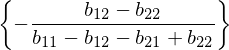

In [102]:
sym.solveset(y * (b_11 - b_12) + b_12 - y * (b_21 - b_22) - b_22, y)

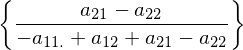

In [103]:
sym.solveset(x * (a_11 - a_21) + a_21 - x * (a_12 - a_22) - a_22, x)

We see that as:

$$\min(a_{11}, a_{22}) > \max(a_{12}, a_{21})$$ 
$$\min(b_{11}, b_{22}) > \max(b_{12}, b_{21})$$ 

the above expressions are between 0 and 1 (thus a valid probability).